# TOPIC 


this topic is about prediction of heart disease by processing patient's dataset . data of patients to whome we need to predict the chance of occurence of a herat disease (predict whether or not they have heart disease).

# Features


##  Data dictionary



1.age - age in years

2.sex - (1 = male; 0 = female)

3.cp - chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart

    1: Atypical angina: chest pain not related to heart

    2: Non-anginal pain: typically esophageal spasms (non heart related)

    3: Asymptomatic: chest pain not showing signs of disease

4.trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5.chol - serum cholestoral in mg/dl

    serum = LDL + HDL + .2 * triglycerides
    
    above 200 is cause for concern
    
6.fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    '>126' mg/dL signals diabetes
    
7.restecg - resting electrocardiographic results

    0: Nothing to note
    
    1: ST-T Wave abnormality
    
          can range from mild symptoms to severe problems
          
          signals non-normal heart beat
          
    2: Possible or definite left ventricular hypertrophy
    
          Enlarged heart's main pumping chamber
          
8.thalach - maximum heart rate achieved

9.exang - exercise induced angina (1 = yes; 0 = no)

10.oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11.slope - the slope of the peak exercise ST segment

    0: Upsloping: better heart rate with excercise (uncommon)
    
    1: Flatsloping: minimal change (typical healthy heart)
    
    2: Downslopins: signs of unhealthy heart
    
12.ca - number of major vessels (0-3) colored by flourosopy

    colored vessel means the doctor can see the blood passing through
    
    the more blood movement the better (no clots)
    
13.thal - thalium stress result

    1,3: normal

    6: fixed defect: used to be defect but ok now

    7: reversable defect: no proper blood movement when excercising

14.target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from scipy.stats import norm

%matplotlib inline


# Loading the data

In [2]:
df = pd.read_csv("C:/Users/HP/Desktop/ML code/first strat/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis (EDA)

 
  In this part, we will prepare and process the data and then visualize and use it to build our Machine Learning models.
  
  Analyzing data sets to summarize their main characteristics, with visual methods.This primarily EDA is for seeing what the data can tell us beyond the formal modeling .



Checking about data types and more information about the data (of each column present in the dataset) , also , about null and not null values present.
 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


 So, in our dataset, we have even int64 data types values and also float64 data type values. 

In [4]:
df.shape

(303, 14)

we have 303 rows and 14 columns.

In [5]:
# Checking for messing values in the data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In this case,  we did not get any of the missing values in any of the columns.


##  Descriptive statistics of the data-sets

In [6]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


we can take a look at the summary of each attribute, which includes the count, mean, the min and max values as well as some percentiles.

# Data Visualization

The variation of values across the DataFrame for first 150 values

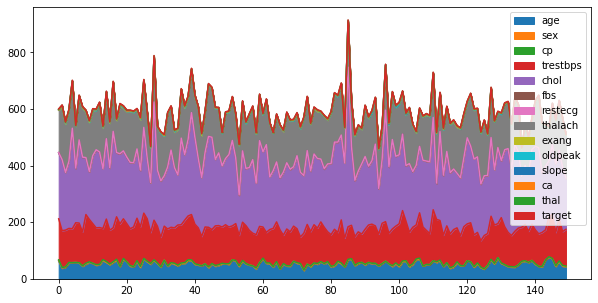

In [7]:
df.head(150).plot(kind='area',figsize=(10,5));

## histograms

Histograms are a great and simple way to take a look at distributions of variables.so we'll use Matplotlib to plot a histogram that displays the distribution of our dataset.

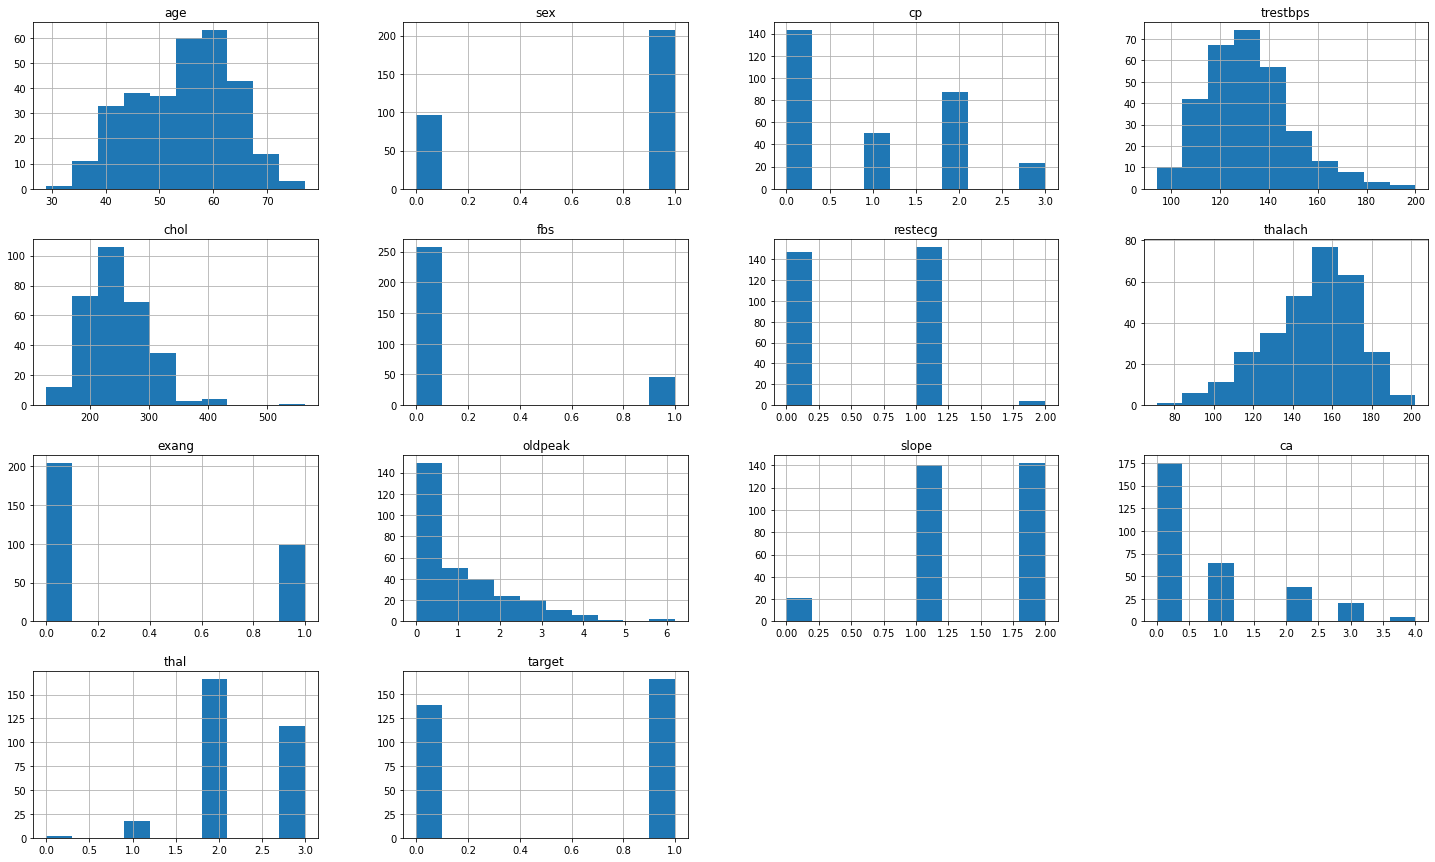

In [8]:
# plot histograms
df.hist(bins=10, figsize=(25, 15))
plt.show()

## Boxplots

Box plots are used to represent data according to their quartiles .They also have lines extending vertically from the boxes indicating the variance outside the upper and lower quartile .The Space between different parts of the box indicate the variance(Spread) of the data.It also helps in detection of outliers.

In [9]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [10]:
df.iplot(kind='box',title='box plot')
# click on features in the legend of the plot 

## Pair Plots

Pair Plot is primarily used when we want to study the behavior of all variables with every other variables when the data is more than 2-Dimension.

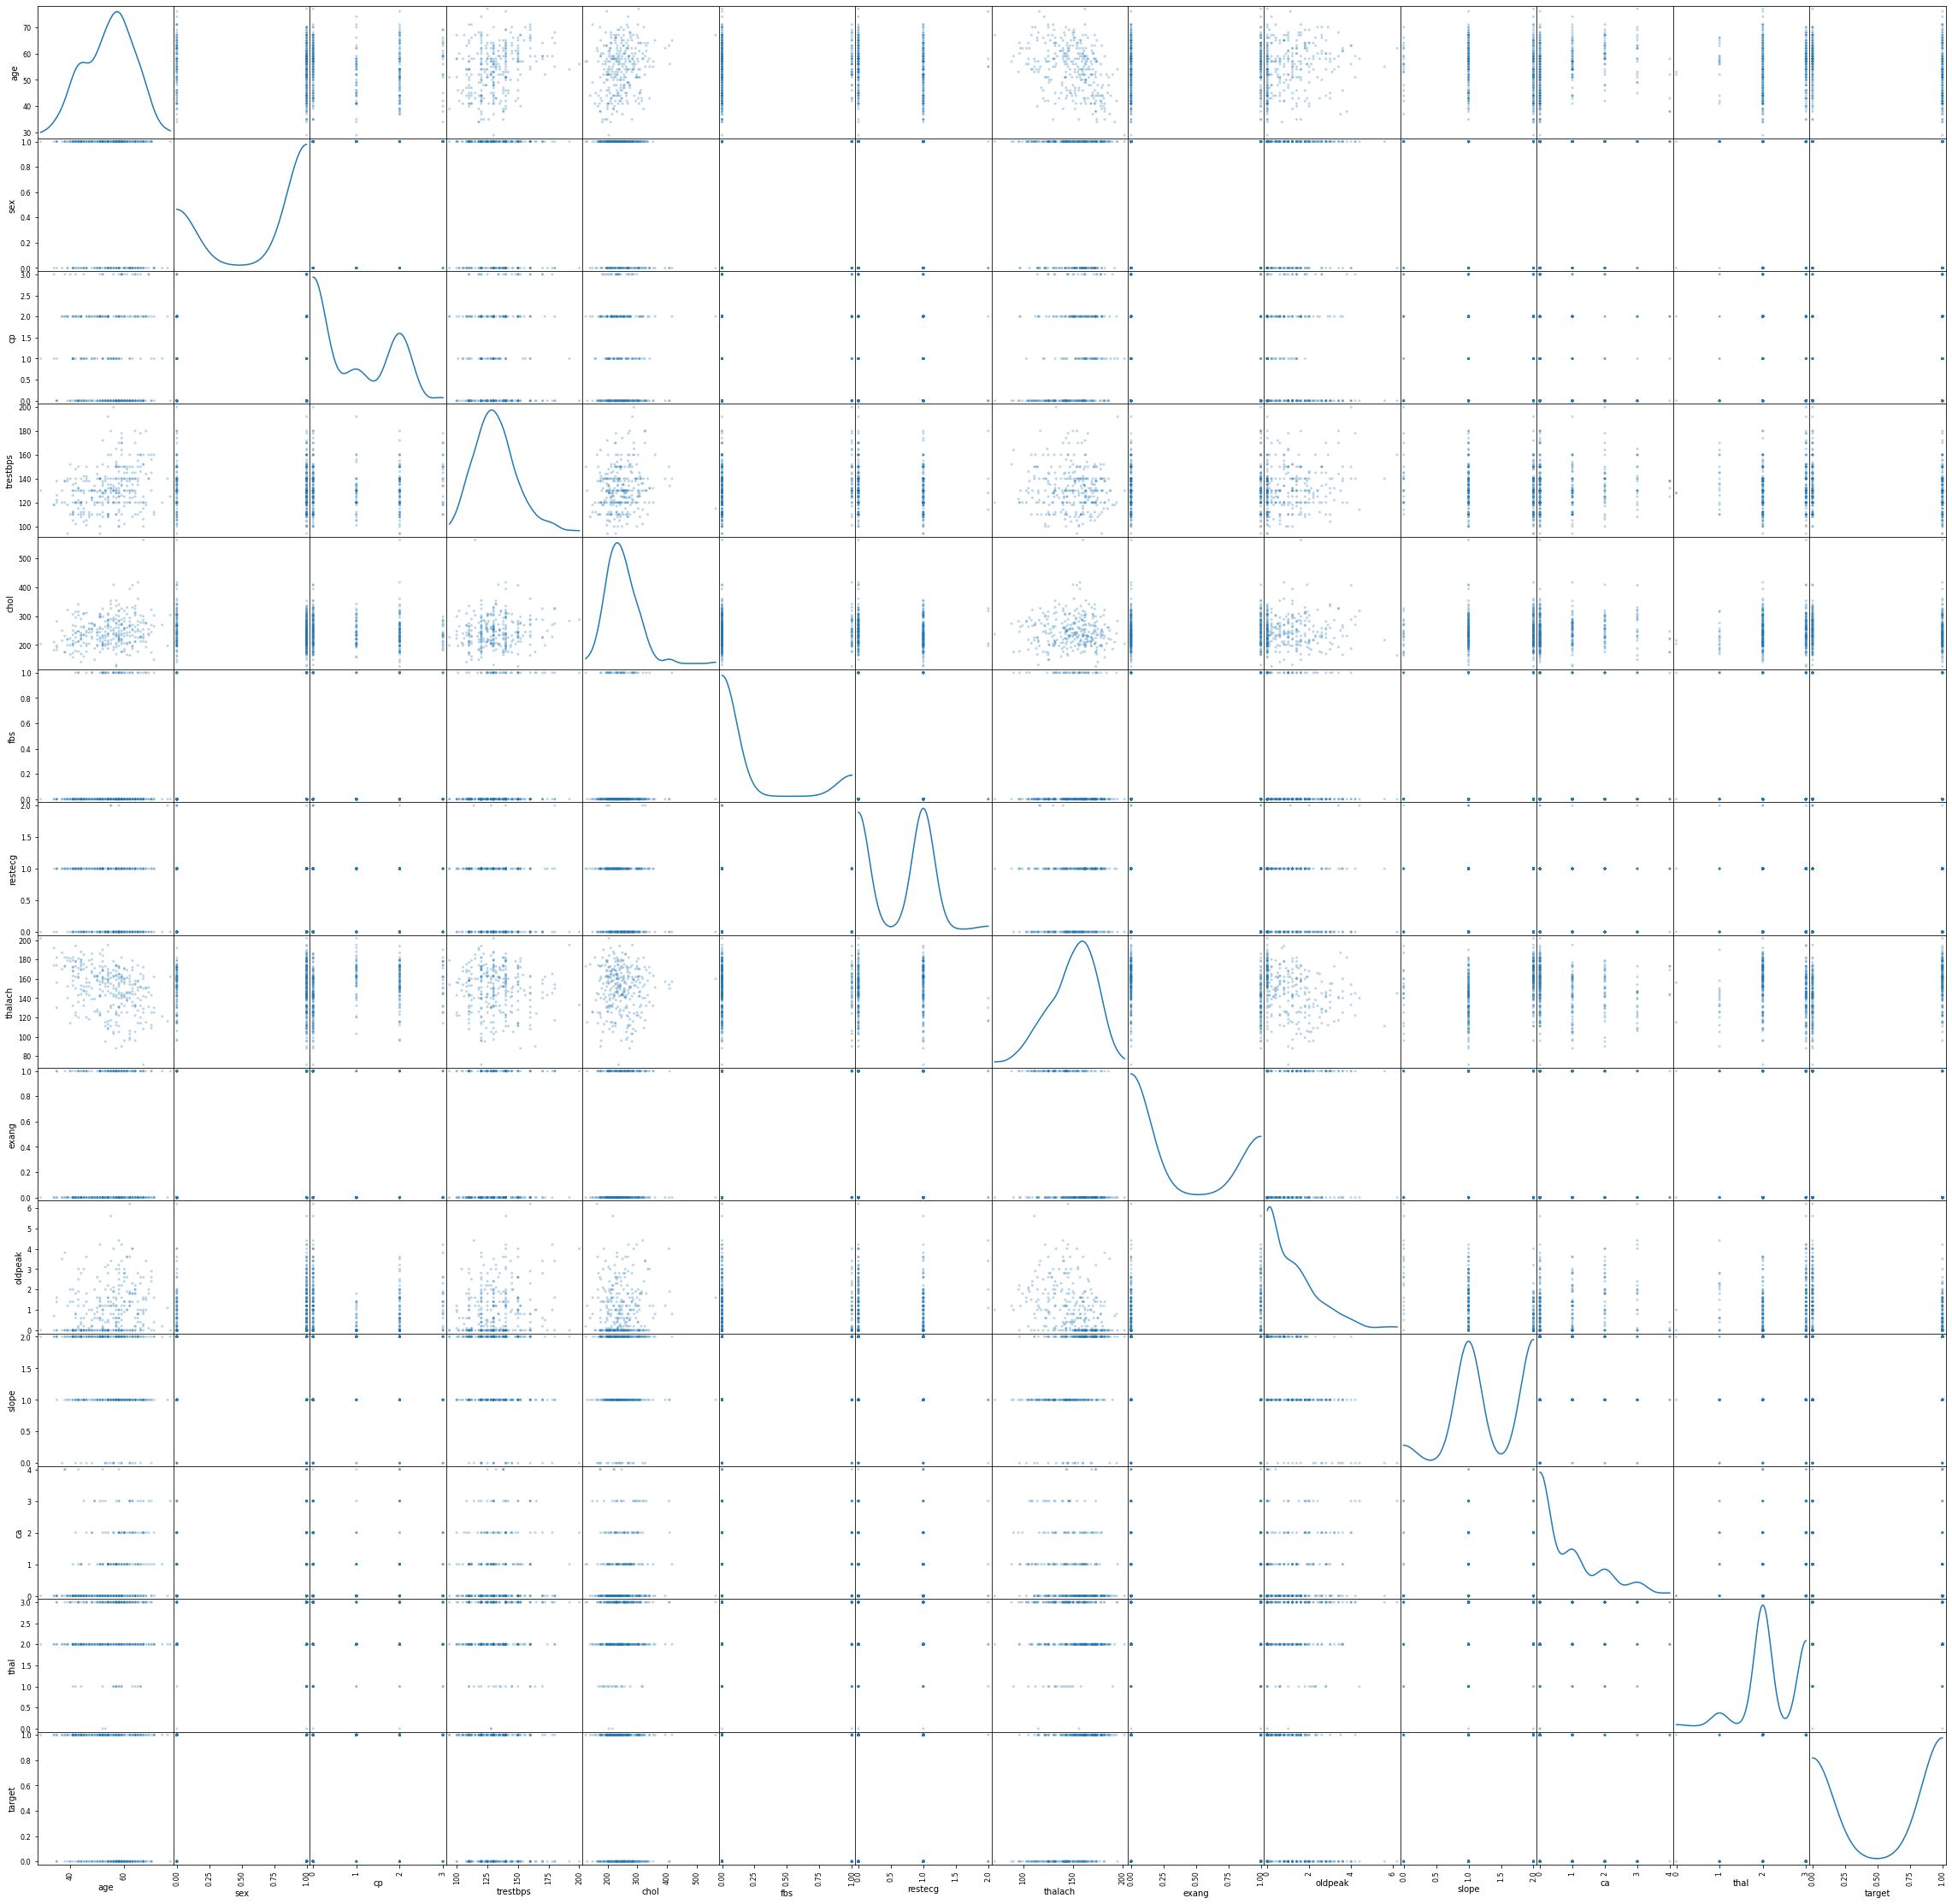

In [11]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

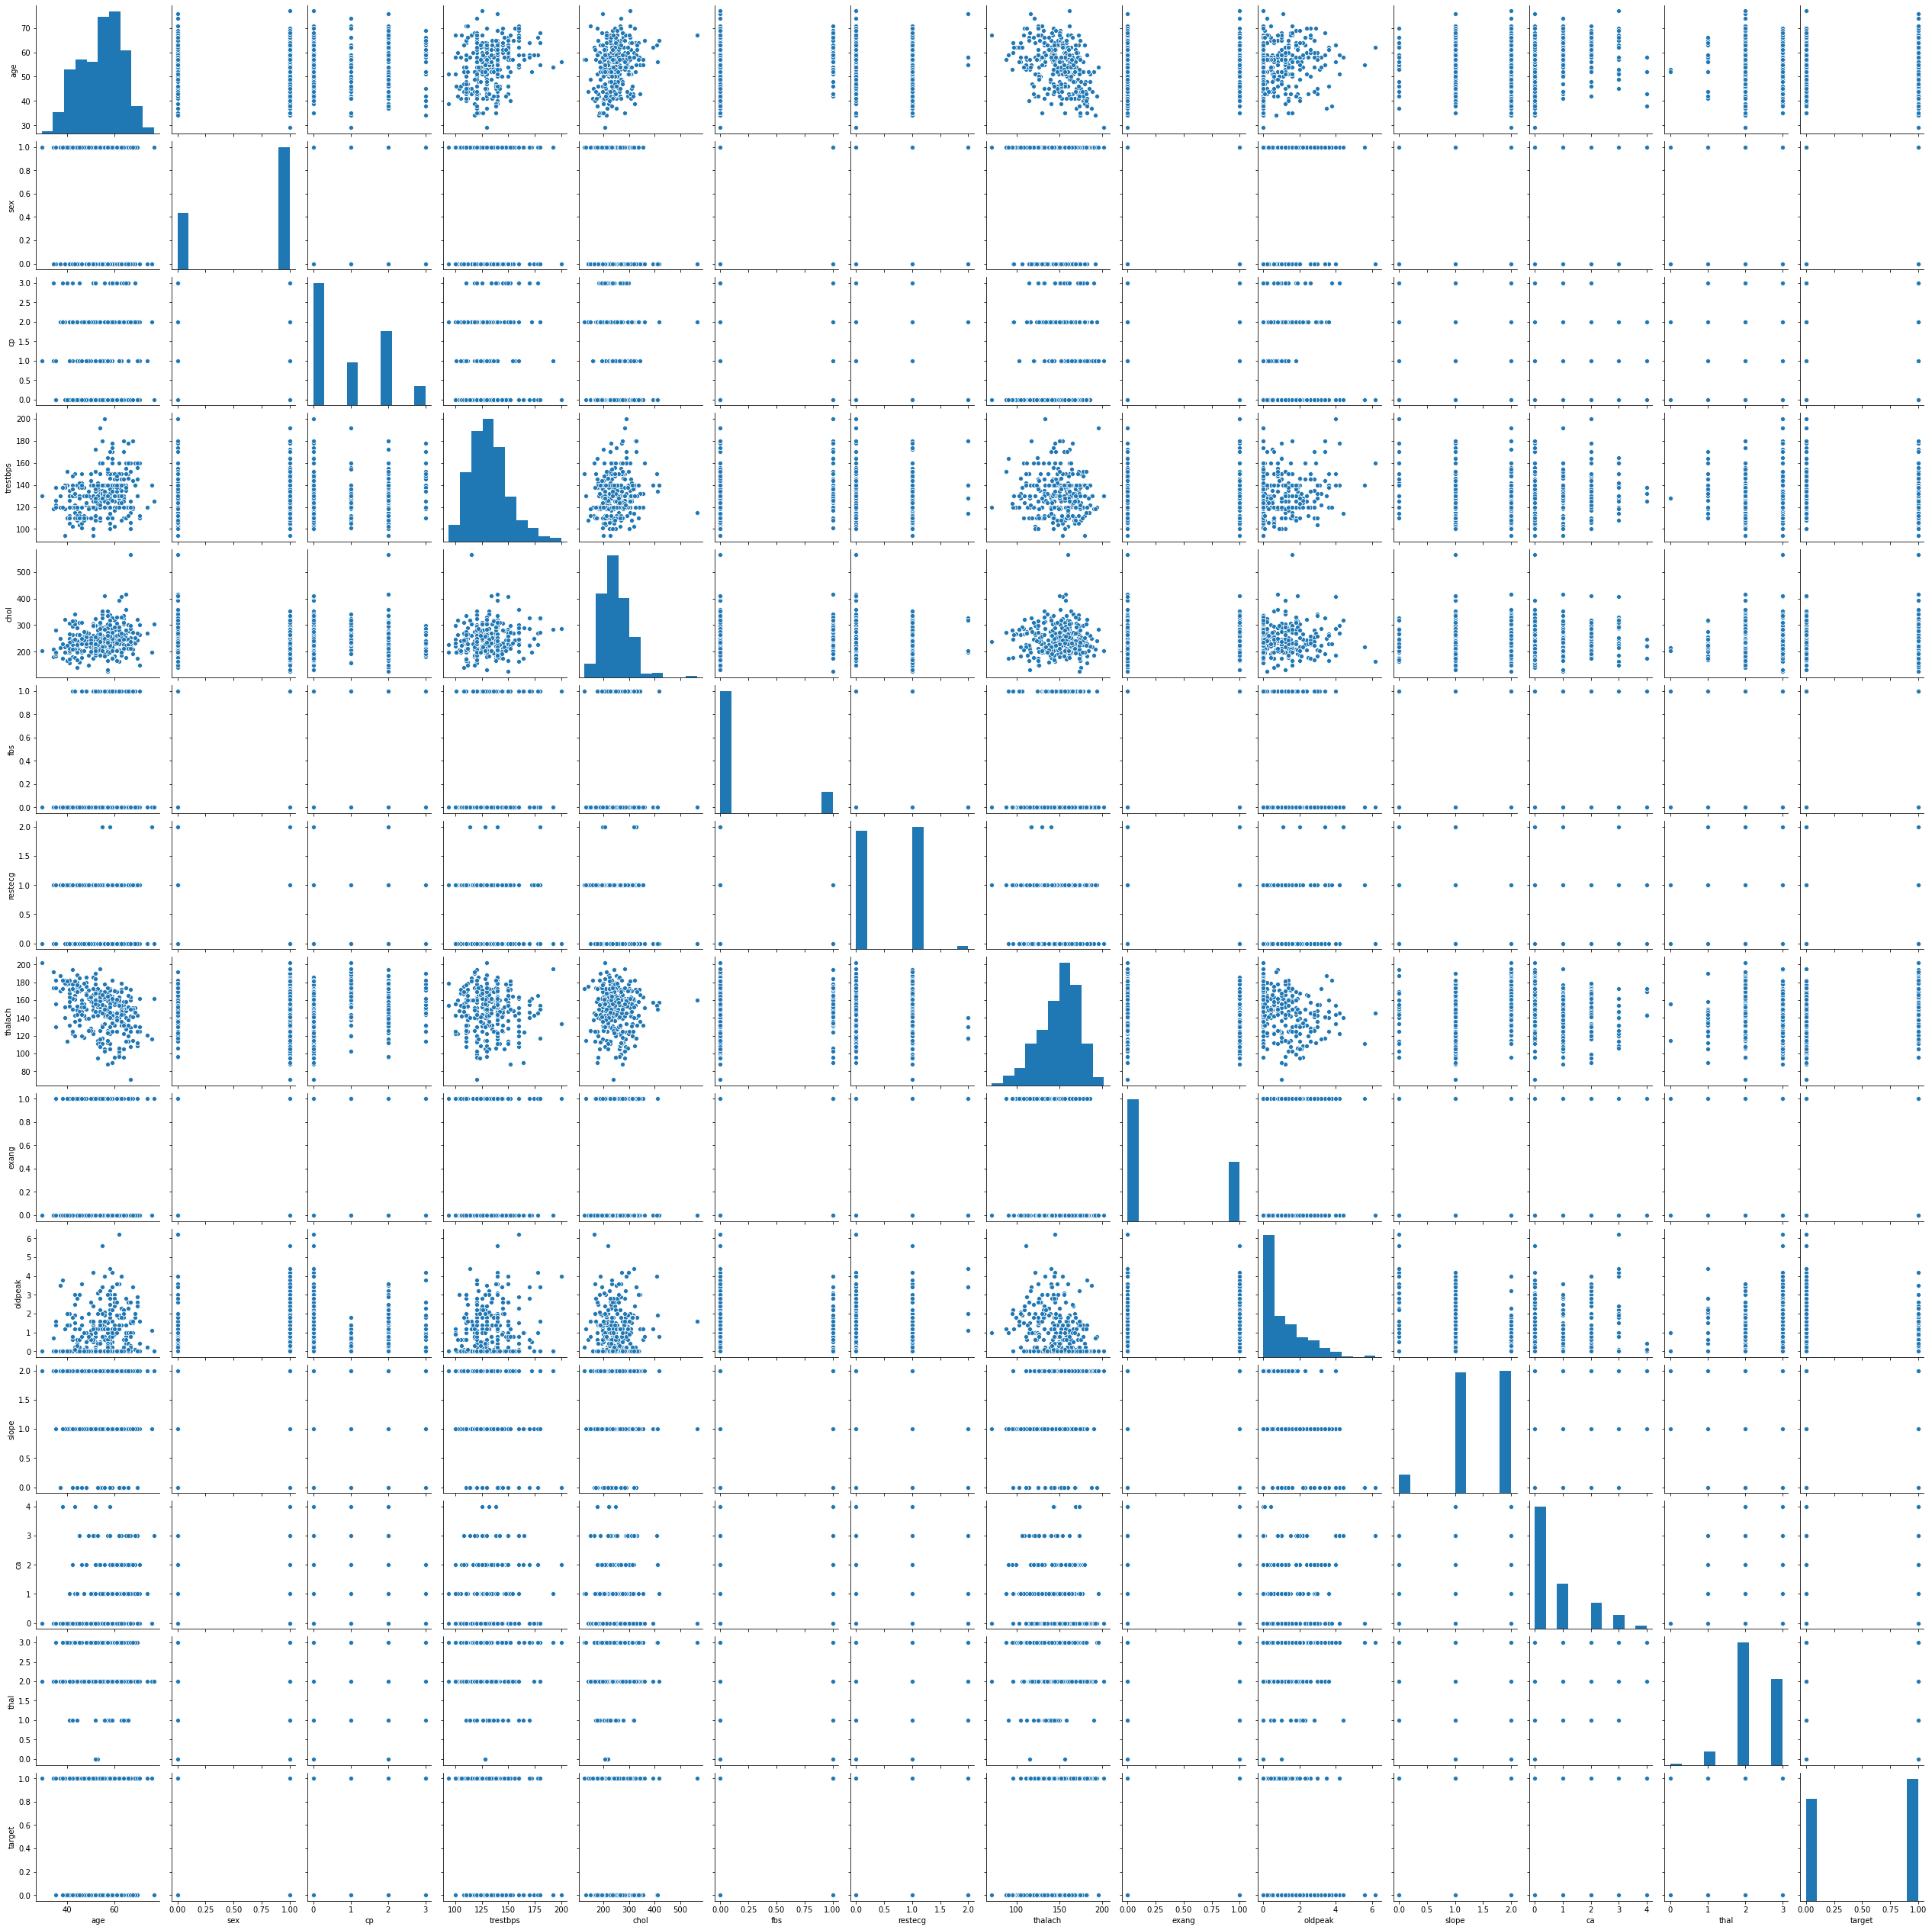

In [12]:
sns.pairplot(data=df)


From the above plot we can get some interesting details. For some of the features, the distribution appears to be fairly linear. For some others, the distribution appears to be negatively skewed.

In [13]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

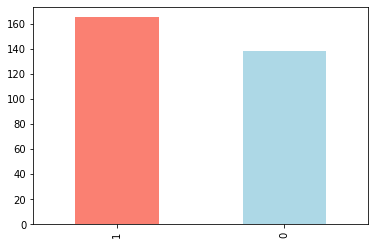

In [14]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

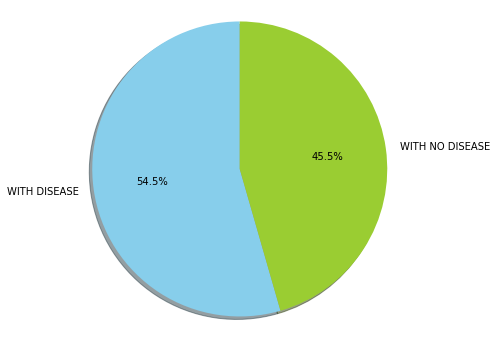

In [15]:
YES=len(df[df['target'] == 1])
NO= len(df[df['target']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'WITH DISEASE','WITH NO DISEASE'
sizes = [YES,NO]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

We have 165 person with heart disease and 138 person without heart disease, we can say that there is some balance.

In [16]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [17]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

##  Target analysis with categorical variables

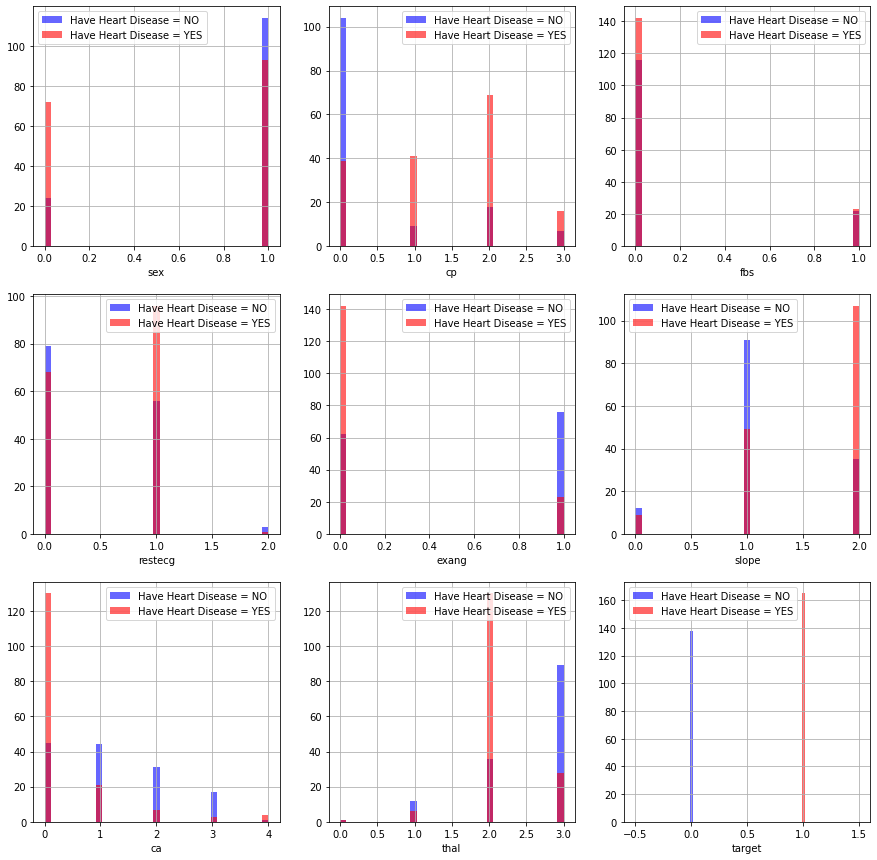

In [18]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.


slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.

exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)


ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.



## Target analysis with continuous variables

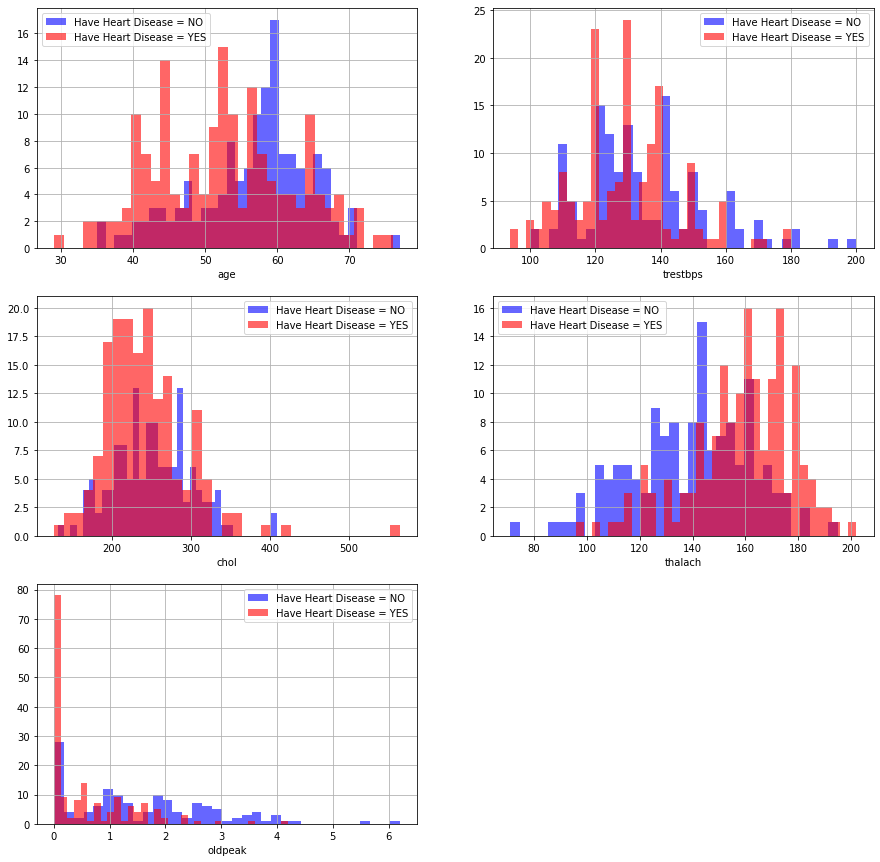

In [19]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for heart disease .

chol {serum cholestoral in mg/dl} : above 200 is cause for heart disease.

thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.

oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

# Correlation Matrix

Checking about correlation between features in a dataset

(14.5, -0.5)

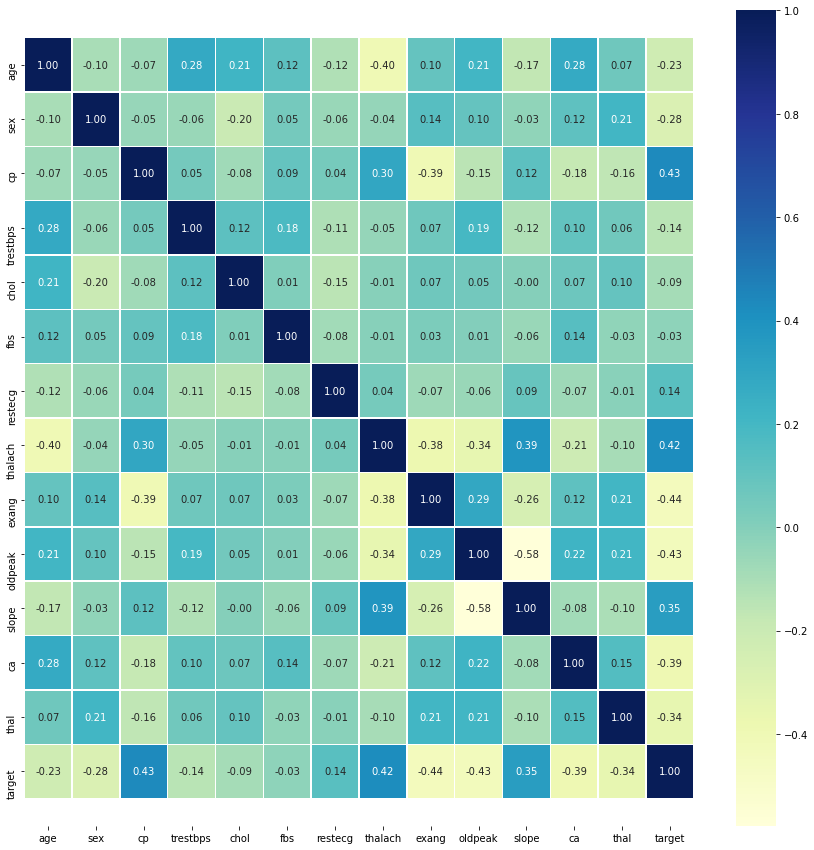

In [20]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

For modelling,its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.

It’s a good practice to remove correlated variables during feature selection.


<AxesSubplot:title={'center':'Correlation with target'}>

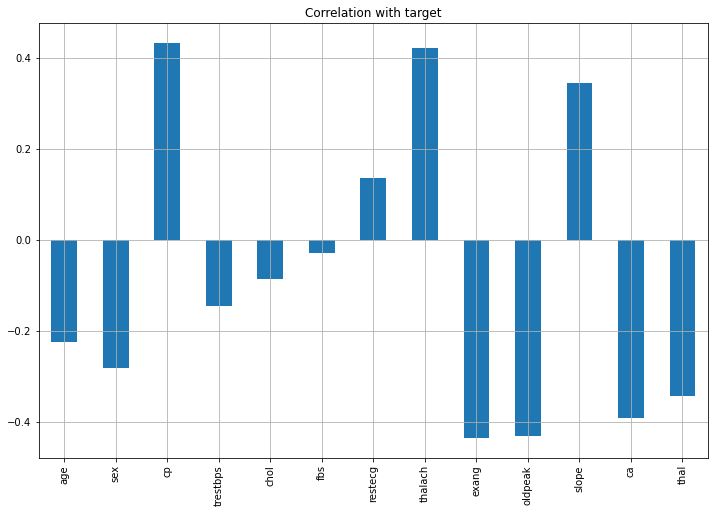

In [21]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

<AxesSubplot:>

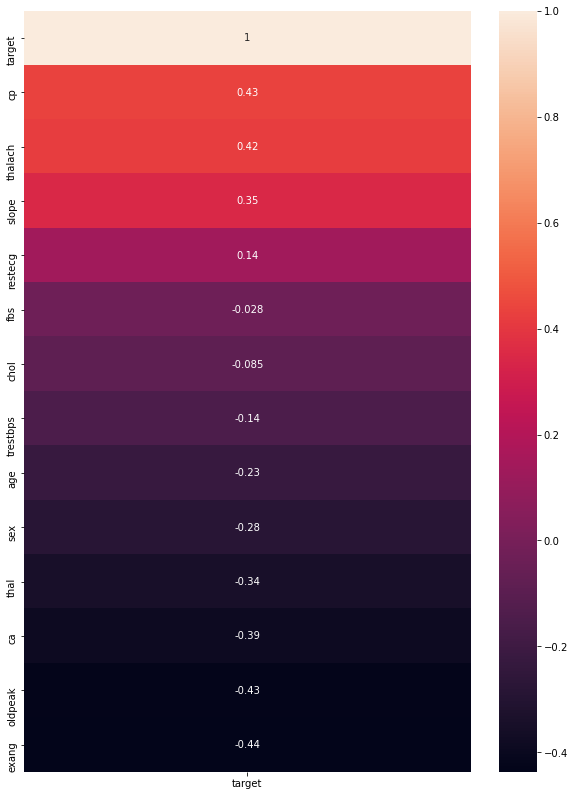

In [22]:
fig, ax = plt.subplots(figsize=(10,14))
saleprice_corr = df.corr()[['target']].sort_values(
  by='target', ascending=False)
sns.heatmap(saleprice_corr, annot=True, ax=ax) 


Lighter colors in the map indicate higher positive correlation values and darker colors indicate lower positive correlation values and sometimes negative correlation values:

target vs exang and oldpeakand and ca (negative correlation)

target vs cp   and tthalach (positive correlation)



fbs and chol are the lowest correlated with the target variable. that mean taht cholestoral  blood sugar don't affect the risk of a heart disease . 

All other variables have a significant correlation with the target variable, increase the risk of heart disease .

In [23]:
target_exang=df[['target','exang']]
target_exang.sort_values('exang').iplot(x='target',y='exang',xTitle='target',yTitle='exang',mode='markers',title='target vs exang',bestfit=True,bestfit_colors=['blue'])

we can see exercise induced angina is dropping for patients with heart disease

In [24]:
target_cp=df[['target','cp']]
target_cp.sort_values('cp').iplot(x='target',y='cp',xTitle='target',yTitle='cp',mode='markers',title='target vs cp',bestfit=True,bestfit_colors=['blue'])

With increase in chest pain type , patients become with heart disease .

Age vs. Max Heart Rate for Heart Disease

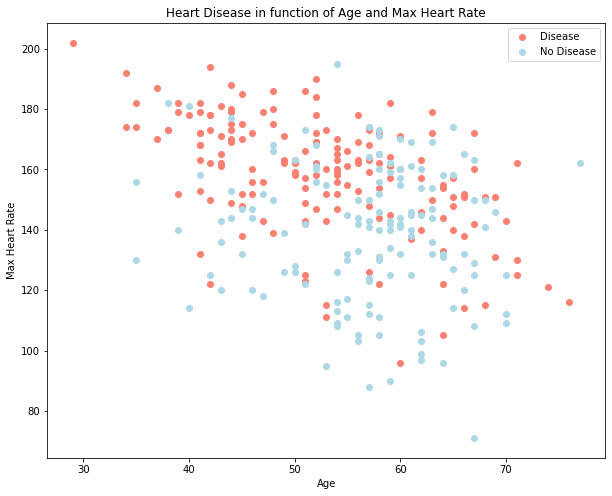

In [25]:
#scatter PLot 
plt.figure(figsize=(10, 8))

# Scatter with postivie correlation
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative correlation
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

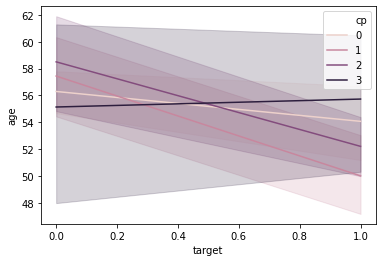

In [26]:
info = df.iloc[1:303,:14]
sns.lineplot(x = "target", y = "age", data=info, hue="cp")
plt.show()

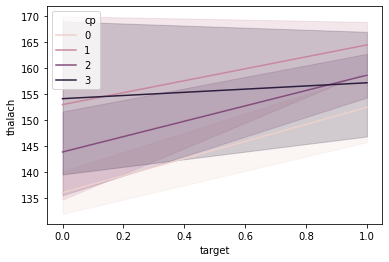

In [27]:
sns.lineplot(x = "target", y = "thalach", data=info, hue="cp")
plt.show()

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models (If data is not scaled and is passed to the algorithm the result might be wrong due to wrongly distributed data.).

## Encoding categorical features 

In [28]:
#the get_dummies method
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [29]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [30]:
print(df.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


## Standardization of data 

For scaling the data we use the pre-processing module that has classes like StandardScaler that is converting the mean to be zero and standard deviation to be unit on training data which can be further used in test data as well , and assumes that our data has a Gaussian (bell curve) distribution .

This step is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

In [31]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [32]:
dataset[col_to_scale].mean(axis=0)

age         0.00
trestbps   -0.00
chol       -0.00
thalach    -0.00
oldpeak    -0.00
dtype: float64

In [33]:
dataset[col_to_scale].std(axis=0)

age        1.00
trestbps   1.00
chol       1.00
thalach    1.00
oldpeak    1.00
dtype: float64

In [34]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Applying machine learning algorithms

creating a function that return directly the performance's metrics of each models .

Since the target variable classes in the data are nearly balanced , Accuracy is a good measure 

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
      
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        

## splitting the dataset into a training set and test set

We make training and test sets to make sure that after we train our classification algorithm, it is able to generalize well to new data.

In [36]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# logistic regression 

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [77]:
from sklearn.linear_model import LogisticRegression

logisticreg = LogisticRegression(solver='liblinear')
logisticreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [78]:
test_score = accuracy_score(y_test, logisticreg.predict(X_test)) * 100
train_score = accuracy_score(y_train, logisticreg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81


## confusion matrix 


we look at the confusion matrix to evaluate the performance of logistic regression classification .

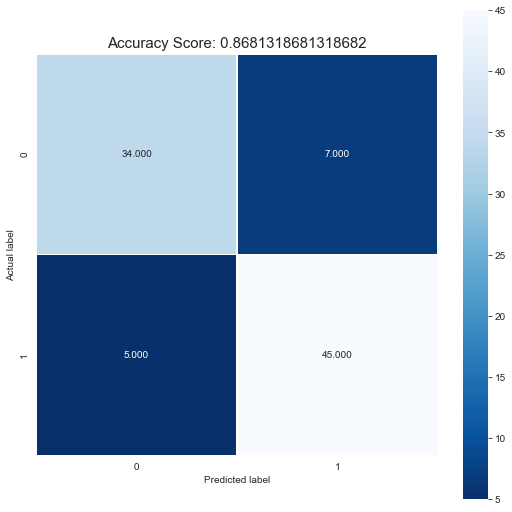

In [79]:
predictionsreg = logisticreg.predict(X_test)
score = logisticreg.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsreg)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The confusion matrix shows 34( True Positive)+45(True Negative) =79  correct predictions , and

 7(False Positive)+5(False Negative)= 12 incorrect ones.


In [80]:
print_score(logisticreg, X_train, y_train, X_test, y_test, train=True)
print_score(logisticreg, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 85.95%
			Recall Score: 90.43%
			F1 score: 88.14%
Test Result:

Accuracy Score: 86.81%
_______________________________________________
Classification Report:	Precision Score: 86.54%
			Recall Score: 90.00%
			F1 score: 88.24%


Accuracy : is the number of correct predictions made by the model over all kinds predictions made. Out of all the classes, how many we predicted correctly  ,It should be high as possible.

                      Accuracy= (TP+TN)/(TP+FP+TN+FN)

Precision : is a measure that tells us what proportion of patients that we diagnosed as having heart disease, actually had heart disease. The predicted positives (People predicted with heart disease are TP and FP) and the people actually having a heart disease are TP.Out of all the positive classes, how many that we have predicted correctly are actually positive.
   
                      Precision=TP/(TP+FP)

Recall : is a measure that tells us what proportion of patients that actually had heart disease was diagnosed by the algorithm as having heart disease. The actual positives (People having heart disease are TP and FN) and the people diagnosed by the model having a heart disease are TP. (Note: FN is included because the Person actually had a heart disease even though the model predicted otherwise).Out of all the positive classes,how many we predicted correctly . It should be high as possible.
                      
                      recall=TP/(TP+FN)


## Receiver Operating Characterstic(ROC) Curve


ROC-curve is a graph representing the performance of a classification model for all classification thresholds. This curve plots the rate of true positives versus false positives.

An ROC curve plots True Positive Rate (TPR) vs. False Positive Rate (FPR)  at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. 

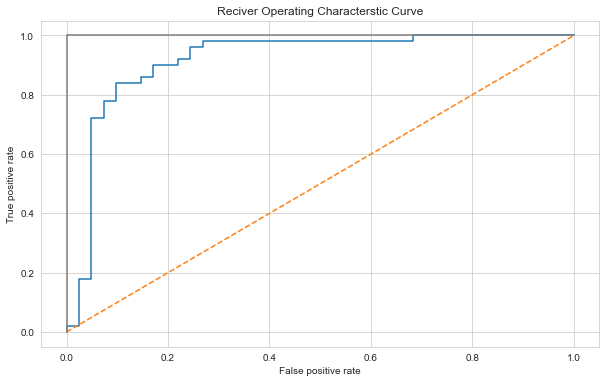

In [81]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_log = logisticreg.predict_proba(X_test)[:,1]
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

ROC  give curve closer to the top-left corner indicate a better performance. ( The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.)

## AUC: Area Under the ROC Curve

That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).
AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

In [82]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_log)

0.9165853658536586

 the AUC is higher,  the model is better at predicting 0s as 0s and 1s as 1s.  the model is better at distinguishing between patients with disease and no disease.

# Support Vector machine


A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. 

In [83]:
from sklearn.svm import SVC

SVM = SVC(kernel='rbf', gamma=0.1, C=1.0,probability=True)
SVM.fit(X_train, y_train)


SVC(gamma=0.1, probability=True)

In [84]:
print_score(SVM, X_train, y_train, X_test, y_test, train=True)
print_score(SVM, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 93.40%
_______________________________________________
Classification Report:	Precision Score: 93.16%
			Recall Score: 94.78%
			F1 score: 93.97%
Test Result:

Accuracy Score: 87.91%
_______________________________________________
Classification Report:	Precision Score: 89.80%
			Recall Score: 88.00%
			F1 score: 88.89%


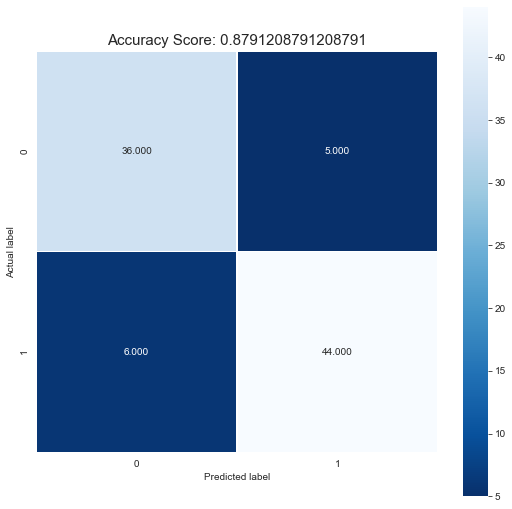

In [85]:
predictionsSVM = SVM.predict(X_test)
score = SVM.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsSVM)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

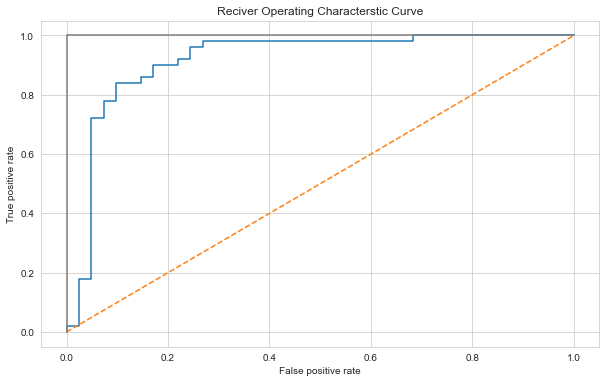

In [86]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_SVM = SVM.predict_proba(X_test)[:,1]
#Create true and false positive rates
SVM_false_positive_rate,SVM_true_positive_rate,SVM_threshold = roc_curve(y_test,
                                                             target_probailities_SVM)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [87]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_SVM)

0.906829268292683

In [88]:
test_score = accuracy_score(y_test, SVM.predict(X_test)) * 100
train_score = accuracy_score(y_train, SVM.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,Support Vector Machine,93.40,87.91


# Decision Tree Classifier

Decision Trees are a type of Supervised Learning Algorithms. The training data is continuously split into two more sub-nodes according to a certain parameter. The tree can be explained by two things, leaves and decision nodes. The decision nodes are where the data is split. The leaves are the decisions or the final outcomes. You can think of a decision tree in programming terms as a tree that has a bunch of “if statements” for each node until you get to a leaf node (the final outcome).

In [89]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
Test Result:

Accuracy Score: 78.02%
_______________________________________________
Classification Report:	Precision Score: 84.09%
			Recall Score: 74.00%
			F1 score: 78.72%


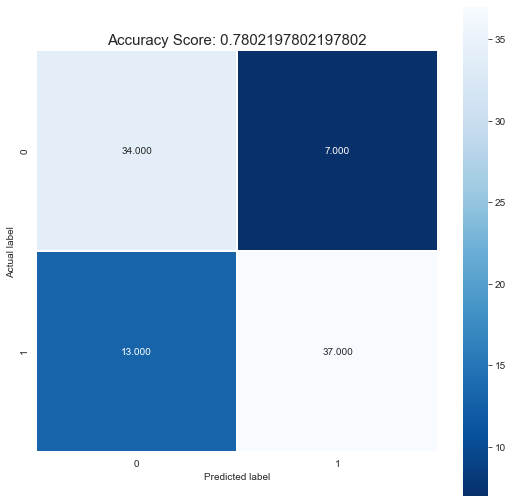

In [90]:
predictions = tree.predict(X_test)
score = tree.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

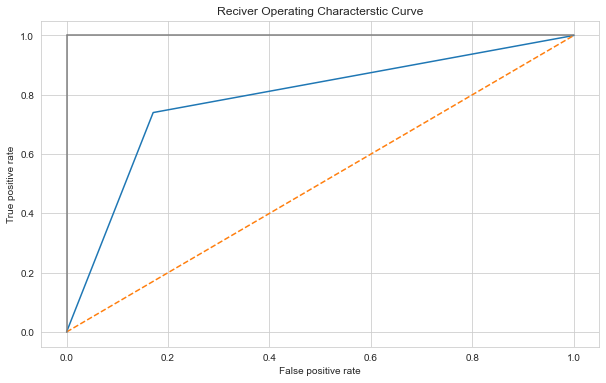

In [91]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_tree = tree.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [92]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_log)

0.9165853658536586

In [93]:
test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,Support Vector Machine,93.40,87.91
2,Decision Tree Classifier,100.00,78.02


# Random Forest Classifier 

It is an ensemble tree-based learning algorithm. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.

In this part we'll creating a Random Forest Regression model and fitting it to the training data , then Predicting the test set results and making the Confusion matrix and the ROC curve.

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

randomforest = RandomForestClassifier(n_estimators=1000, random_state=42)
randomforest.fit(X_train, y_train)

print_score(randomforest, X_train, y_train, X_test, y_test, train=True)
print_score(randomforest, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
Test Result:

Accuracy Score: 82.42%
_______________________________________________
Classification Report:	Precision Score: 84.00%
			Recall Score: 84.00%
			F1 score: 84.00%


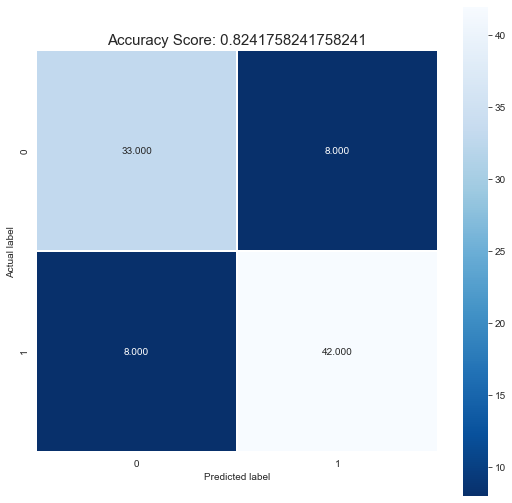

In [95]:
predictionsrandomforest = randomforest.predict(X_test)
score = randomforest.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsrandomforest)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

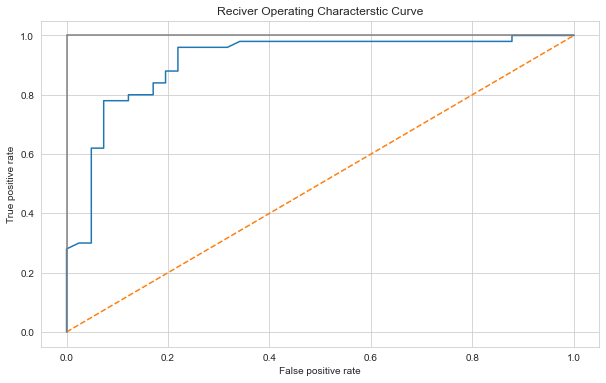

In [96]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_rnfr = randomforest.predict_proba(X_test)[:,1]
#Create true and false positive rates
rnd_false_positive_rate,rnd_true_positive_rate,rnd_threshold = roc_curve(y_test,
                                                             target_probailities_rnfr)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rnd_false_positive_rate,rnd_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [97]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_rnfr)

0.9136585365853659

In [98]:
test_score = accuracy_score(y_test, randomforest.predict(X_test)) * 100
train_score = accuracy_score(y_train, randomforest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,Support Vector Machine,93.40,87.91
2,Decision Tree Classifier,100.00,78.02
3,Random Forest Classifier,100.00,82.42


# Boosting

In [99]:
from xgboost import XGBClassifier

boosting = XGBClassifier()
boosting.fit(X_train, y_train)

print_score(boosting, X_train, y_train, X_test, y_test, train=True)
print_score(boosting, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
Test Result:

Accuracy Score: 82.42%
_______________________________________________
Classification Report:	Precision Score: 84.00%
			Recall Score: 84.00%
			F1 score: 84.00%


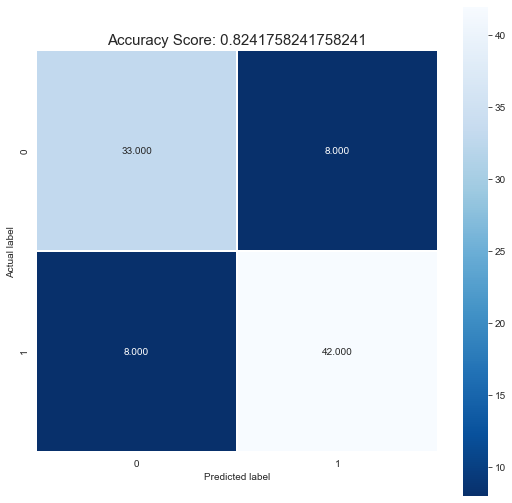

In [100]:
predictionsboosting = boosting.predict(X_test)
score = boosting.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsboosting)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

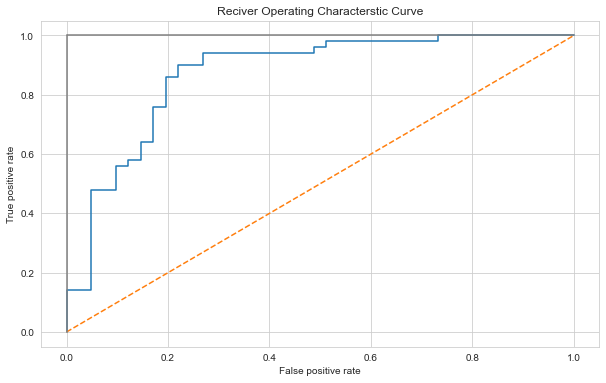

In [101]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_boosting = boosting.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_boosting)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [102]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_boosting)

0.8702439024390243

In [103]:
test_score = accuracy_score(y_test, boosting.predict(X_test)) * 100
train_score = accuracy_score(y_train, boosting.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["boosting", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,Support Vector Machine,93.40,87.91
2,Decision Tree Classifier,100.00,78.02
3,Random Forest Classifier,100.00,82.42
4,boosting,100.00,82.42


# Artificial neural network  ANN

Neural networks , where the structure of the human brain inspires the algorithms. Neural networks take input data, train themselves to recognize patterns found in the data, and then predict the output for a new set of similar data. Therefore, a neural network can be thought of as the functional unit of deep learning, which mimics the behavior of the human brain to solve complex data-driven problems.

In [104]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
ANN.fit(X_train,y_train)

predictionsANN = ANN.predict(X_test)
print_score(ANN, X_train, y_train, X_test, y_test, train=True)
print_score(ANN, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 98.58%
_______________________________________________
Classification Report:	Precision Score: 97.46%
			Recall Score: 100.00%
			F1 score: 98.71%
Test Result:

Accuracy Score: 86.81%
_______________________________________________
Classification Report:	Precision Score: 89.58%
			Recall Score: 86.00%
			F1 score: 87.76%


C:\Users\HP\anaconda3\envs\cmdpy37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



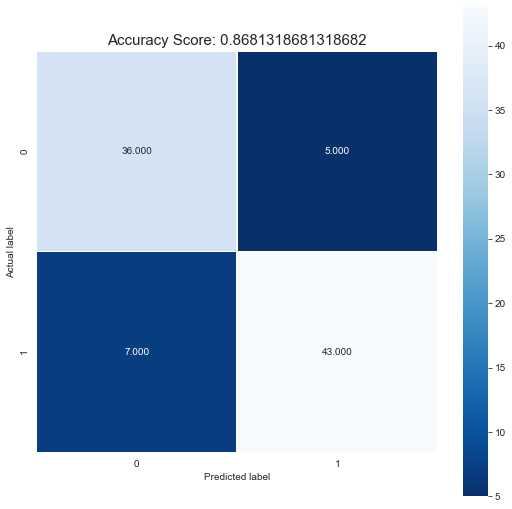

In [105]:
score = ANN.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsANN)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

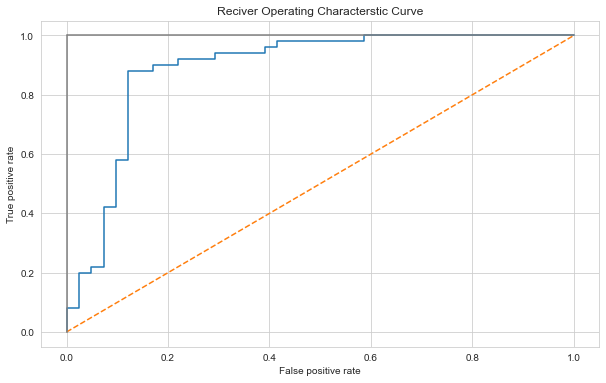

In [106]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_ANN = ANN.predict_proba(X_test)[:,1]
#Create true and false positive rates
ANN_false_positive_rate,ANN_true_positive_rate,ANN_threshold = roc_curve(y_test,
                                                             target_probailities_ANN)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(ANN_false_positive_rate,ANN_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [111]:
roc_auc_score(y_test,target_probailities_ANN)

0.8878048780487804

In [107]:
test_score = accuracy_score(y_test,ANN.predict(X_test)) * 100
train_score = accuracy_score(y_train, ANN.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Artificial neural network", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,Support Vector Machine,93.40,87.91
2,Decision Tree Classifier,100.00,78.02
3,Random Forest Classifier,100.00,82.42
4,boosting,100.00,82.42
5,Artificial neural network,98.58,86.81


# Comparing models

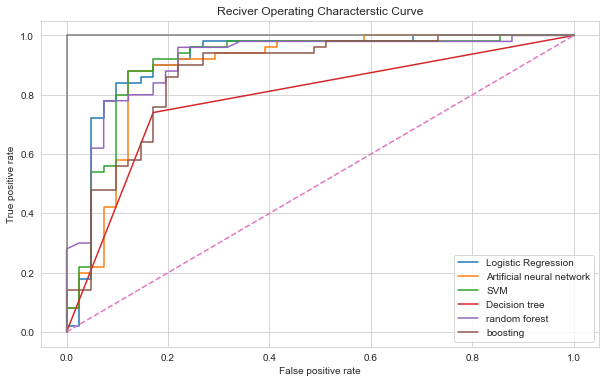

In [108]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(ANN_false_positive_rate,ANN_true_positive_rate,label='Artificial neural network')
plt.plot(SVM_false_positive_rate,SVM_true_positive_rate,label='SVM')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Decision tree')
plt.plot(rnd_false_positive_rate,rnd_true_positive_rate,label='random forest')
plt.plot(boost_false_positive_rate,boost_true_positive_rate,label='boosting')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [109]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,Support Vector Machine,93.40,87.91
2,Decision Tree Classifier,100.00,78.02
3,Random Forest Classifier,100.00,82.42
4,boosting,100.00,82.42
5,Artificial neural network,98.58,86.81


In [112]:
#logistic regression
auc_score=roc_auc_score(y_test,target_probailities_log)
auc = pd.DataFrame(data=[["Logistic Regression",auc_score ]], 
                          columns=['Model', 'AUC'])
#SVM
auc_score=roc_auc_score(y_test,target_probailities_SVM)
auc_2=pd.DataFrame(data=[["Support vector machine",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)

#tree
auc_score=roc_auc_score(y_test,target_probailities_tree)
auc_2=pd.DataFrame(data=[["decision tree classifier ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)
# random forest 
auc_score=roc_auc_score(y_test,target_probailities_rnfr)
auc_2=pd.DataFrame(data=[["Random Forest classifier ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)
# boosting
auc_score=roc_auc_score(y_test,target_probailities_boosting)
auc_2=pd.DataFrame(data=[["boosting ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)
#artificial neural network 

auc_score=roc_auc_score(y_test,target_probailities_ANN)
auc_2=pd.DataFrame(data=[["artificial neural network  ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)
auc

,Model,AUC
0,Logistic Regression,0.92
1,Support vector machine,0.91
2,decision tree classifier,0.78
3,Random Forest classifier,0.91
4,boosting,0.87
5,artificial neural network,0.89


According to this modest comparison we could conclude that support vector machine is the best classification model for our problem and that because it has the highest AUC and the highest accuracy
